# Принятие решений в бизнесе на основе данных. 

## Описание исследования

**Цель исследования:** необходимо проанализировать гипотезы и выявить самые оптимальные. 

**Входные данные:** данные со списком гипотез и данные о группах А/В-теста.

**План работы:** 

1. изучить общую информацию о предоставленных данных; 

2. подготовить данные, т.е. выявить и удалить (заменить) пропущенные значения и дубликаты, изменить тип данных при необходимости; 

3. провести приоритизацию гипотез; 

4. провести анализ А/В-теста; 

5. проанализировать результаты.

Данное исследование позволит выявить наиболее выгодные направления в деятельности интернет-магазина для дальнейшего внедрения и  увеличения выручки.

## Подготовка

###  [Загрузка библиотек](#1)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

### [Загрузка датасетов и предобработка данных](#2)

In [2]:
try: orders, visitors, hypothesis = (
 pd.read_csv('/datasets/orders.csv'),
 pd.read_csv('/datasets/visitors.csv'),
 pd.read_csv('/datasets/hypothesis.csv'), 
)
except: orders, visitors, hypothesis = (
 pd.read_csv('C:/Users/user/Downloads/orders.csv'), 
 pd.read_csv('C:/Users/user/Downloads/visitors.csv'), 
 pd.read_csv('C:/Users/user/Downloads/hypothesis.csv'), 
)  

In [3]:
#Посмотрим как выгрузились данные и опишем их 
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Данные orders.csv:

    •	transactionId — идентификатор заказа;
    •	visitorId — идентификатор пользователя, совершившего заказ;
    •	date — дата, когда был совершён заказ;
    •	revenue — выручка заказа;
    •	group — группа A/B-теста, в которую попал заказ.

Данные visitors.csv:

    •	date — дата;
    •	group — группа A/B-теста;
    •	visitors — количество пользователей в указанную дату в указанной группе A/B-теста
 
Данные hypothesis.csv:

    •	Hypothesis — краткое описание гипотезы;
    •	Reach — охват пользователей по 10-балльной шкале;
    •	Impact — влияние на пользователей по 10-балльной шкале;
    •	Confidence — уверенность в гипотезе по 10-балльной шкале;
    •	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [6]:
#Приведем дату в нужный формат и посмотрим пропуски
orders['date'] = orders['date'].astype('datetime64[D]')
visitors['date'] = visitors['date'].astype('datetime64[D]')
orders.info()
print('------------------------------------------------------')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Пропуски отсутствуют.

In [7]:
#Проверим совпадают ли периоды в датасетах, найдем мах и min даты
orders_date_min = orders['date'].min()
orders_date_max = orders['date'].max()
print('Дата min:', orders_date_min, 'Дата max:', orders_date_max)

Дата min: 2019-08-01 00:00:00 Дата max: 2019-08-31 00:00:00


In [8]:
visitors_date_min = orders['date'].min()
visitors_date_max = orders['date'].max()
print('Дата min:', visitors_date_min, 'Дата max:', visitors_date_max)

Дата min: 2019-08-01 00:00:00 Дата max: 2019-08-31 00:00:00


Даты совпадают.

In [9]:
if orders.duplicated().sum() > 0:
    print('Дубликатов: ', orders.duplicated().sum())
else:
    print('Дубликаты отсутствуют')

Дубликаты отсутствуют


In [10]:
if visitors.duplicated().sum() > 0:
    print('Дубликатов: ', visitors.duplicated().sum())
else:
    print('Дубликаты отсутствуют')

Дубликаты отсутствуют


**Вывод:**

Данные подготовлены к дальнейшему исследованию, пропуски и дубликаты отсутствуют, даты приведены к нужному типу, периоды в датасетах совпадают.

In [11]:
# Проверим, не попадают ли какие-то пользователи в обе группы
visitorsA = orders[orders['group']=='A']['visitorId'].sort_values().unique()
visitorsB = orders[orders['group']=='B']['visitorId'].sort_values().unique()
visitors_duplicate = list(set(visitorsA) & set(visitorsB))
len(visitors_duplicate)

58

In [12]:
# В обе группы попали 58 пользователей, т.к. их малое количество, удалим.
orders = orders.query('visitorId not in @visitors_duplicate')

## Приоритизация гипотез

### [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#3)

In [13]:
pd.set_option('max_colwidth', 200)

In [14]:
hypothesis['ice'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='ice', ascending =False).round(2)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#4)

In [15]:
hypothesis['rice'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='rice', ascending =False).round(2)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.](#5)

**Вывод**

При применении RICE вместо ICE изменилась приоритизация гипотез, если после применения ICE лидерами были гипотезы: 

    '8' - 'Запустить акцию, дающую скидку на товар в день рождения', 
    '0' - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей', 
    '7' - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок', 
    
то при применениии RICE лидерами стали гипотезы 

    '7' - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
    '2' - 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа', 
    '0' - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'. 

Думаю, что это связанно с тем, что при ICE не был учтен Reach — скольких пользователей затронет изменение, которое хотите внести.

Гипотезу '7' - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок', будем тестировать первой.

## Анализ A/B-теста

#### [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#6)

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis = 1)
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [17]:
#Проверим совпадают ли период в датасете, найдем мах и min даты
cumulativeData_min = cumulativeData['date'].min()
cumulativeData_max = cumulativeData['date'].max()
print('Дата min:', cumulativeData_min, 'Дата max:', cumulativeData_max)

Дата min: 2019-08-01 00:00:00 Дата max: 2019-08-31 00:00:00


Минимальная и максимальная даты в исходных датасетах и в новом датасете совпадают. 

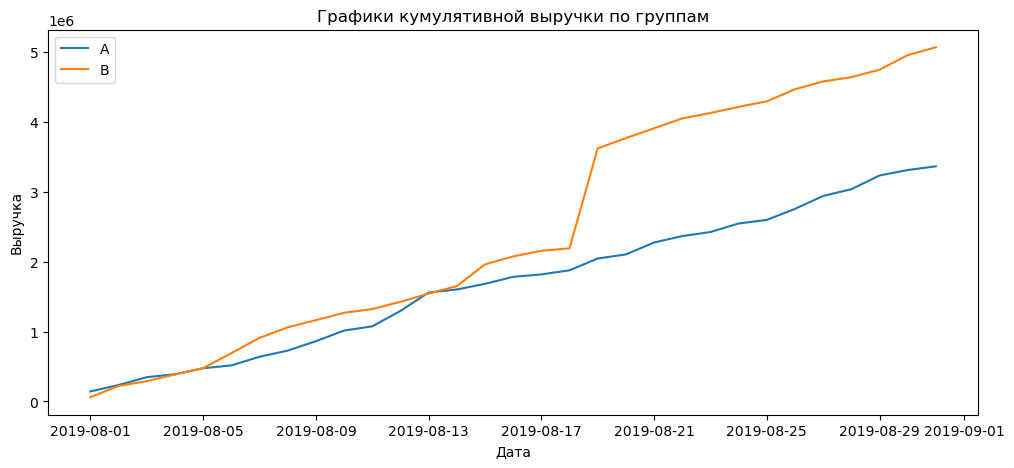

In [18]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам')
plt.legend()
plt.show()

**Вывод:**

По графику видим, что выручка равномерно увеличивается в течение всего теста у обеих групп, но группа В показывает стабильно лучшие результаты. 18 агуста был скачок в группе В, что может говорить об увеличении числа заказов, либо о появлении очень дорогих заказов.

#### [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#7)

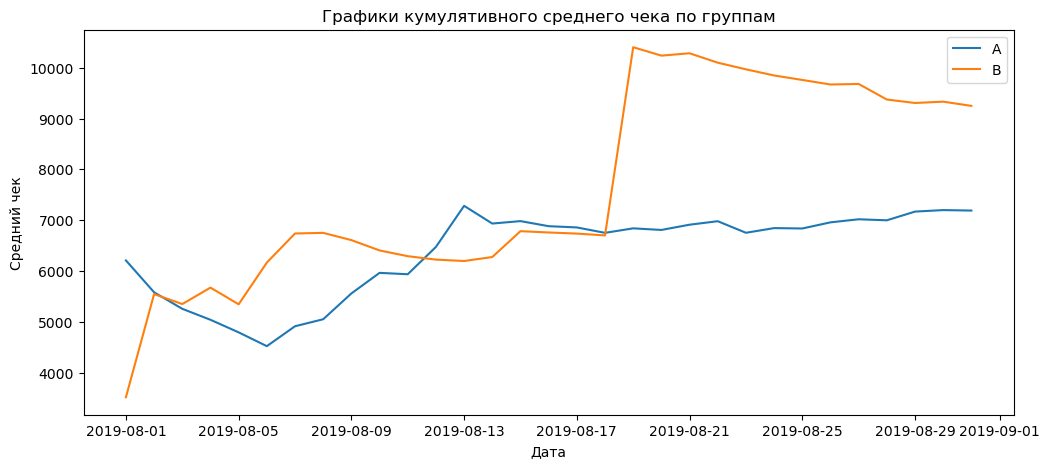

In [19]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

**Вывод:**

Средний чек становится равномерным ближе к концу теста для группы А, для группы B после скачка идет снижение. Возможно, в группу B попали крупные заказы. Чтобы прийти к реальному среднему чеку и установиться на его уровне, возможно нужно больше данных.

#### [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#8)

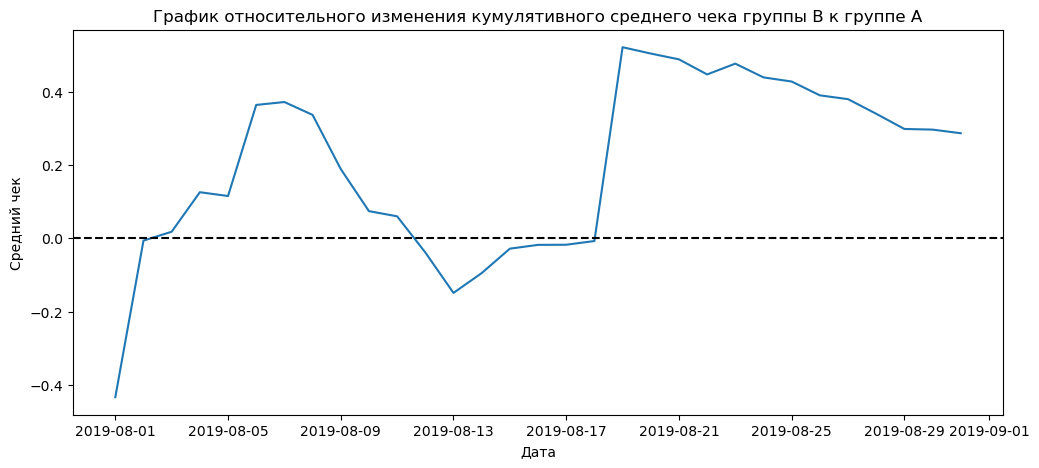

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
                                          (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

**Вывод:**

В нескольких точках график различия между сегментами резко «скачет». Возможно это крупные заказы и выбросы, необходимо будет проверить.

#### [Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.](#9)

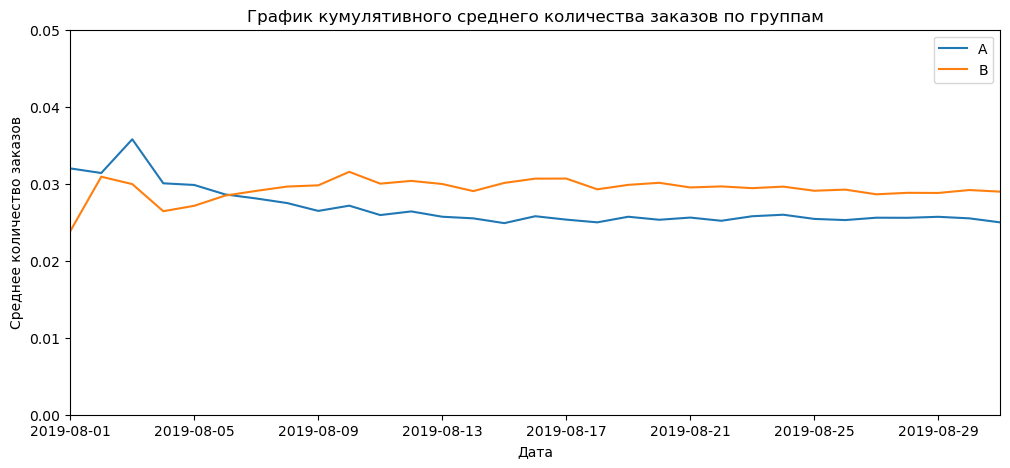

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
plt.figure(figsize=(12,5))
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов по группам')
plt.ylabel('Среднее количество заказов')
plt.xlabel('Дата')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]);
plt.legend()
plt.show()

**Вывод:**

В начале теста среднее количество заказов колебалось у обоих групп, затем выровнялось и закрепилось практически на одном значении, среднее группы В стабильно выше среднего группы А.

#### [Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.](#10)

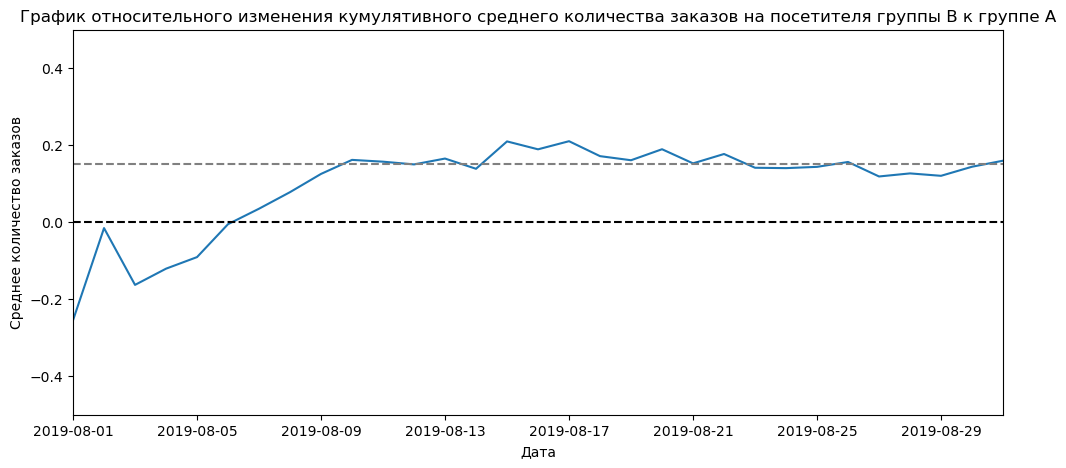

In [22]:
plt.figure(figsize=(12,5))
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Среднее количество заказов')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5]);

**Вывод:**

Среднее число заказов группы В по отношению к среднему группы А в начале теста колебалось, затем поднялось до 20 %, а более стабильно расположилось в районе 15%.

#### [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#11)

        visitor  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


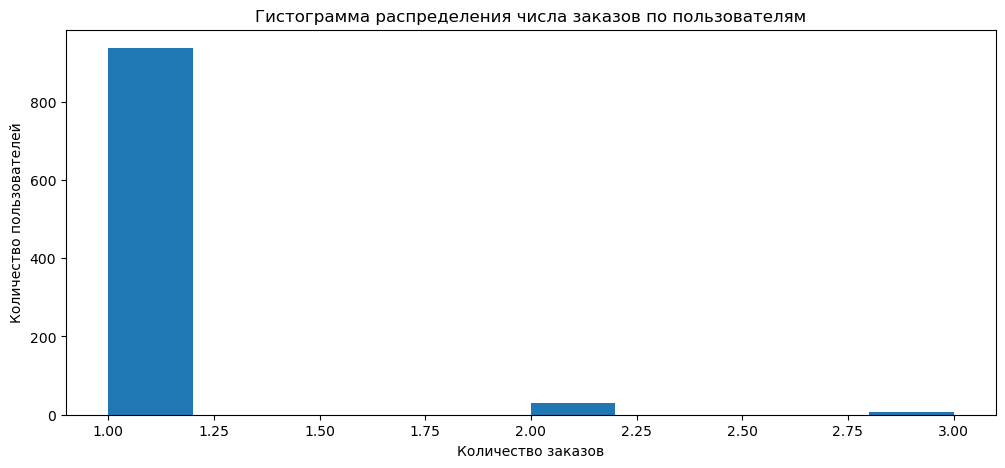

In [23]:
# Построим гистограмму распределения числа заказов по пользователям
plt.figure(figsize=(12,5))
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitor', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
plt.hist(ordersByUsers['orders'])
plt.title('Гистограмма распределения числа заказов по пользователям')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов');

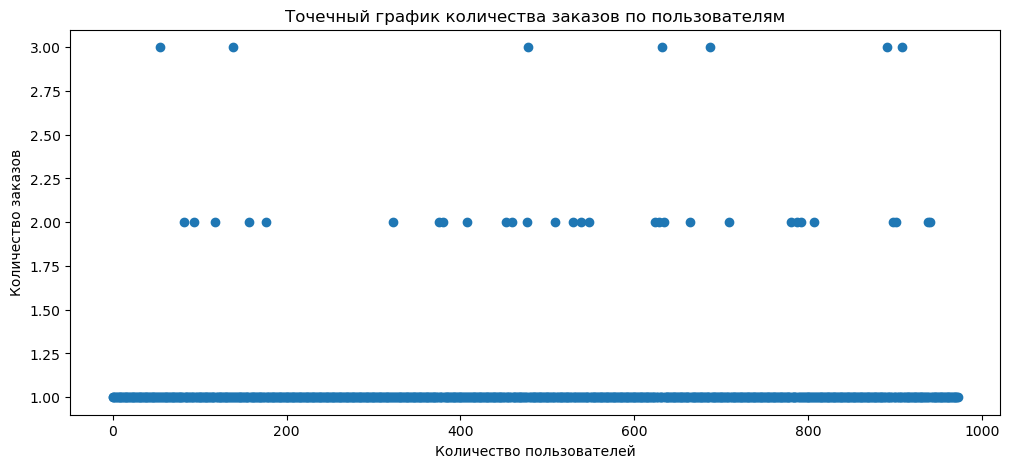

In [24]:
# Построим точечный график количества заказов по пользователям
plt.figure(figsize=(12,5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей');

**Вывод:**

Пользователей, сделавших заказ более 2 раз, очень мало, возможно это аномалии. 

#### [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#12)

In [25]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print(percentiles)
percentil99 = int(np.percentile(ordersByUsers['orders'], [99]))
#print(percentil99)

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
[1. 2.]


**Вывод:**

Как и говорилось ранее, пользователей, совершивших более 2 заказов не более 1%. За границу выбросов возьмем 99 перцентиль.

#### [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#13)

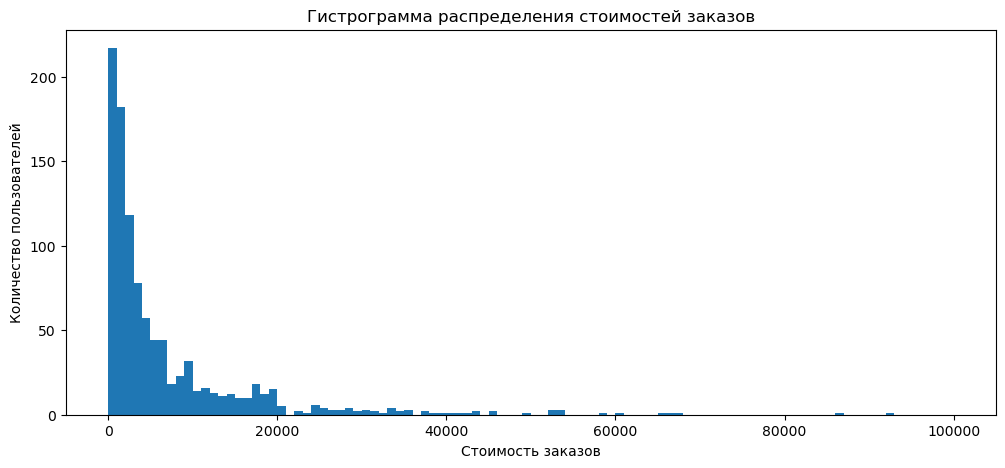

In [26]:
# Построим гистограмму распределения стоимостей заказов
plt.figure(figsize=(12,5))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения стоимостей заказов')
plt.ylabel('Количество пользователей')
plt.xlabel('Стоимость заказов');
plt.show()
x_values = pd.Series(range(0, len(orders)))

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A


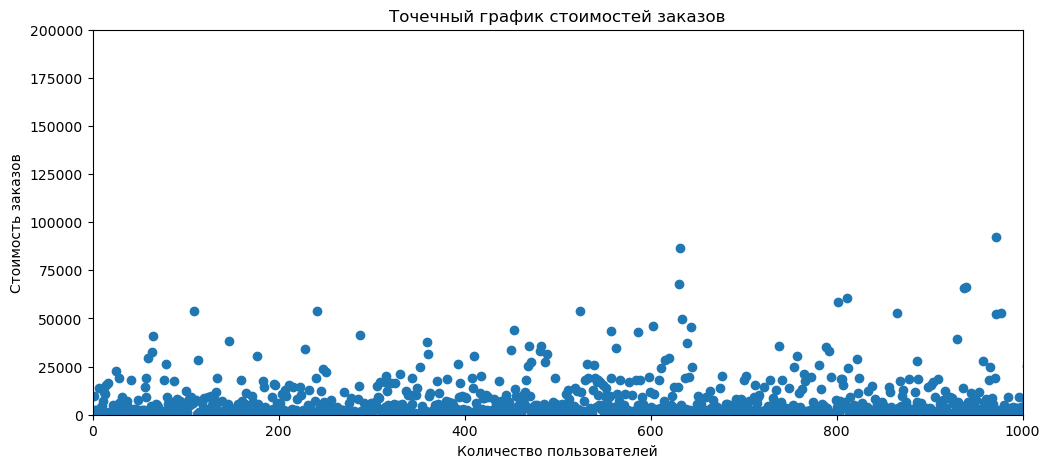

In [27]:
# Построим точечный график количества заказов по пользователям
plt.figure(figsize=(12,5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1000, 0, 200000])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей');
print(orders.sort_values(by='revenue', ascending=False).head(10))

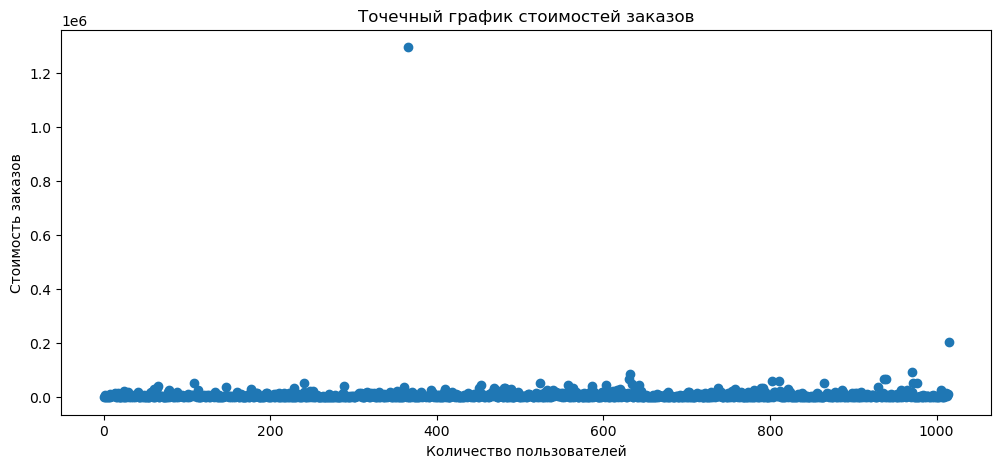

In [28]:
# Построим точечный график количества заказов по пользователям без ограничения масштаба, чтобы картина была полной
plt.figure(figsize=(12,5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей');

**Вывод:**

Большая часть пользователей делает покупки суммой не больше 20 т.р. 

#### [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#14)

In [29]:
percentile95 = int(np.percentile(orders['revenue'], [95]))
print(percentile95)

26785


In [30]:
percentile99 = np.percentile(orders['revenue'], [99])
print(percentile99)

[53904.]


**Вывод:**

Не более 5% заказов дороже 26 т.р. и всего 1% заказов дороже 53 т.р. За границу для определения аномальных заказов возьмем 26 т.р.

#### [Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.](#15)

Нулевая гипотеза будет звучать так: "статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет", а альтернативная гипотеза: "статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным есть".

Будем использовать значение alpha 0,05.

Метод, который будем применять для A/B-тестирования, называется st.mannwhitneyu, т.к. мы будем сравнивать не параметы гипотез, а их ранги.  

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId'] 
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')],axis=0)
sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='transactionId')],axis=0)      
print("Р-value - {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост среднего - {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

Р-value - 0.011
Относительный прирост среднего - 0.160


**Вывод:**

P-value меньше 0.05, значит статистически значимые различия в среднем количестве заказов на посетителя между группами по «сырым» данным присутствуют, значит можем отвергнуть нулевую гипотезу. Относительный прирост среднего группы B по отношению к группе A равен 16%.

#### [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#16)

Нулевая гипотеза будет звучать так: "статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет", а альтернативная гипотеза: "статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным есть".

Будем использовать значение alpha 0,05.

In [32]:
print('Р-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Р-value = 0.829
Относительное различие среднего чека = 0.287


**Вывод:**

P-value больше 0.05, значит статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет, значит отвергнуть нулевую гипотезу нельзя. Относительное различие среднего чека между группами всего 28.7%.

#### [Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами  по «очищенным» данным. Сделайте выводы и предположения.](#17)

Нулевая гипотеза будет звучать так: "статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет", а альтернативная гипотеза: "статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным есть".

Будем использовать значение alpha 0,05.

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > percentil99]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > percentil99]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentile95]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
) 
print('P-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


P-value = 0.012
Относительный прирост среднего = 0.182


**Вывод:**

После очистки данных от аномалий, как и по «сырым» данным P-value меньше 0.05, значит статистически значимые различия в среднем количестве заказов на посетителя между группами присутствуют, значит отвергаем нулевую гипотезу. Относительный прирост среднего группы B по отношению к группе A равен 18,2%. 

#### [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#18)

Нулевая гипотеза будет звучать так: "статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет", а альтернативная гипотеза: "статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным есть".

Будем использовать значение alpha 0,05.

In [34]:
print('P-value = {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId']
.isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))
print("Относительный прирост среднего = {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
/ orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() - 1))

P-value = 0.646
Относительный прирост среднего = -0.048


**Вывод:**

После очистки данных от аномалий, как и по «сырым» данным P-value больше 0.05, значит статистически значимые различия в среднем количестве заказов на посетителя между группами отсутствуют, значит нулевую гипотезу отвергнуть нельзя. Относительный прирост среднего группы B по отношению к группе A равен -0,048.

#### [Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.](#19)

**Вывод:**

-По "сырым" и по "очищенным" данным различия в среднем количестве заказов на посетителя между группами есть, до очистки 12%, после 11%.

-По "сырым" и по "очищенным" данным различия в средних чеках заказа между группами отсутствуют, средний чек группы B оказался ниже среднего чека группы A на 4% по "очищенным" данным, а по "сырым" данным, он был больше на 28%.

-Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B.

Исходя из вышеизложенного можно принять решение остановить тестирование и констатировать успех и победу группы B.